In [5]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from time import time
from NaiveModel import Naive
from sklearn import datasets

''' Shuffles feature matrix and labels in case they are ordered '''
def shuffle(x,y):
    z = list(zip(x,y))
    np.random.shuffle(z)
    x,y = zip(*z)
    return np.array(x),np.array(y)

''' Splits feature matrix and labels into training and testing data '''
def split(x,y,split_percentage):
    split_idx = int(len(y)*split_percentage)
    z = list(zip(x,y))
    z1 = z[:split_idx]
    z2 = z[split_idx:]
    x1,y1 = zip(*z1)
    x2,y2 = zip(*z2)
    return np.array(x1),np.array(y1),np.array(x2),np.array(y2)

''' Generates 2 normally distributed clusters to be used as positive and negative examples '''
def gen_random(p_size, n_size, dims):
    p_mean = np.random.randint(50, size = dims)
    n_mean = np.random.randint(50, size = dims)
    p_sig = (np.random.randint(5, size = dims)+1)*10
    n_sig = (np.random.randint(5, size = dims)+1)*10

    p_data = np.random.normal(p_mean, p_sig, (p_size,dims))
    n_data = np.random.normal(n_mean, n_sig, (n_size,dims))
    labels = np.array([1]*p_size+[0]*n_size)

    data = np.vstack((p_data,n_data))
    data,labels = shuffle(data,labels)
    return data,labels


''' 
performs binary classification over X with the provided model 
    and prints out some useful info
'''
def evaluate(model, X, y):
    X,y = shuffle(X,y)
    x_train, y_train, x_test, y_actual = split(X,y,.70)
    model = model()
    t0 = time()
    model.fit(x_train,y_train)
    t1 = time()
    
    # Shows the decision boundary for each dimension
    #model.plotActivations()

    y_predict = model.predict(x_test)
    t2 = time()
    correct = y_predict == y_actual
    accuracy = correct.sum()/correct.shape[0]
    fp = (y_predict-1 == y_actual).sum()/(y_predict.sum())
    tn = (y_predict+1 == y_actual).sum()/((y_predict-1).sum()*-1)
    print("Accuracy: {}\nFalse Positives: {}\nTrue Negatives: {}\nTime to fit: {}\nTime to predict: {}".format(accuracy,fp, tn, t1-t0, t2-t1))
    plt.scatter(x_test[:,0],x_test[:,1],cmap = 'cividis', c = y_predict, marker = '.')
    plt.show()
    







Artificial
Model: Naive
-----------------------
Accuracy: 0.7853333333333333
False Positives: 0.2836719337848006
True Negatives: 0.07799304520615996
Time to fit: 0.001795053482055664
Time to predict: 0.00046706199645996094


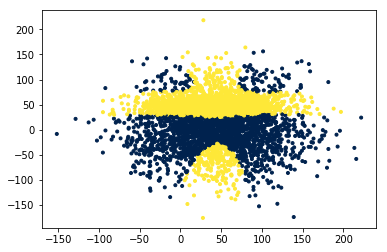



Artificial
Model: GaussianNB
-----------------------
Accuracy: 0.8738333333333334
False Positives: 0.17482311320754718
True Negatives: 0.06288343558282208
Time to fit: 0.002839326858520508
Time to predict: 0.0006215572357177734


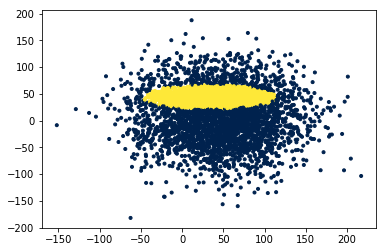

In [2]:
'''
-------------------------------------------------------------------
----------Test on Artificial Dataset-------------------------------------
-------------------------------------------------------------------
'''
X,y = gen_random(10000, 10000, 2)
#plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
#plt.show()

print("\n\nArtificial")
print("Model: Naive\n-----------------------")
evaluate(Naive, X,y)

print("\n\nArtificial")
print("Model: GaussianNB\n-----------------------")
evaluate(GaussianNB, X,y)





IRIS
Model: Naive
-----------------------
Accuracy: 0.9777777777777777
False Positives: 0.0625
True Negatives: 0.0
Time to fit: 0.004202842712402344
Time to predict: 0.0003349781036376953


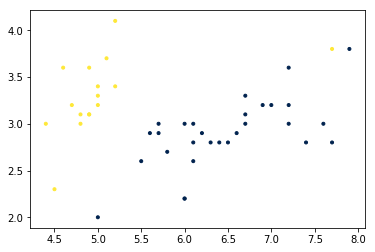



IRIS
Model: GaussianNB
-----------------------
Accuracy: 1.0
False Positives: 0.0
True Negatives: 0.0
Time to fit: 0.0009446144104003906
Time to predict: 0.0002617835998535156


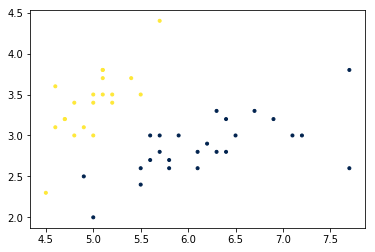

In [3]:
'''
-------------------------------------------------------------------
----------Test on IRIS Dataset-------------------------------------
-------------------------------------------------------------------
'''
iris = datasets.load_iris()
X = iris.data
y = (np.array(iris.target) ==0).astype(int)

print("\n\nIRIS\nModel: Naive\n-----------------------")
evaluate(Naive, X,y)

print("\n\nIRIS\nModel: GaussianNB\n-----------------------")
evaluate(GaussianNB, X,y)




DIGITS
Model: Naive
-----------------------
Accuracy: 0.9148148148148149
False Positives: 0.44554455445544555
True Negatives: 0.002277904328018223
Time to fit: 0.02155590057373047
Time to predict: 0.0011439323425292969


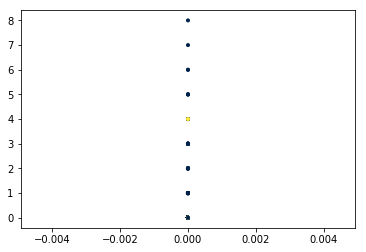



DIGITS
Model: GaussianNB
-----------------------
Accuracy: 0.987037037037037
False Positives: 0.10526315789473684
True Negatives: 0.002070393374741201
Time to fit: 0.0024704933166503906
Time to predict: 0.0006916522979736328


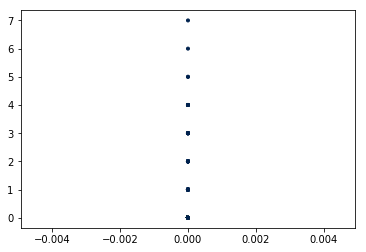

In [4]:
'''
-------------------------------------------------------------------
----------Test on DIGITS Dataset-------------------------------------
-------------------------------------------------------------------
'''
digits = datasets.load_digits()
X = digits.data
y = (np.array(digits.target) ==0).astype(int)


print("\n\nDIGITS\nModel: Naive\n-----------------------")
evaluate(Naive, X,y)

print("\n\nDIGITS\nModel: GaussianNB\n-----------------------")
evaluate(GaussianNB, X,y)



In [ ]:
""